In [1]:
# Import numpy as np
import pandas as pd

attribute_names = []
X = []
y = []
class_names = ['False', 'True']

# Load csv dataset (Brain Tumor.csv).
data = pd.read_csv(r'./data/Brain Tumor.csv', header=0)
dataframe = pd.DataFrame(data)

# Attribute_names label.
attribute_names = list(data.columns)

# All data features with 'Class' removed.
X = dataframe.drop(['Class', 'Image'], axis=1).values

# Classifier for brain tumor (true or false).
y = dataframe['Class'].to_numpy()

In [22]:
# Import splitting, decision tree, gridsearch
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV

# Split data into training and test samples (70/30):
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

# Create model to classify
model = DecisionTreeClassifier()

# Define hyperparameters in dictionary
parameters = {
    'splitter' : ['best', 'random'],
    'criterion' : ['gini', 'entropy'],
    'max_features': ['log2', 'sqrt', 'auto'],
    'max_depth': [2, 4, 6, 8, 10, 15, 20],
    'min_samples_split': [2, 3, 5, 7, 9],
    'min_samples_leaf': [1,5,8,11],
    'random_state' : [0,1,2,3,4,5]
}

# Gridsearch object, with 5-cross validation
grid_search_dt = GridSearchCV(estimator = model, param_grid = parameters, scoring = 'accuracy', cv = 5, verbose = 1, return_train_score=True)

# Fit the data
grid_search_dt.fit(x_train, y_train)

Fitting 5 folds for each of 10080 candidates, totalling 50400 fits


GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [2, 4, 6, 8, 10, 15, 20],
                         'max_features': ['log2', 'sqrt', 'auto'],
                         'min_samples_leaf': [1, 5, 8, 11],
                         'min_samples_split': [2, 3, 5, 7, 9],
                         'random_state': [0, 1, 2, 3, 4, 5],
                         'splitter': ['best', 'random']},
             return_train_score=True, scoring='accuracy', verbose=1)

In [3]:
print(grid_search_dt.best_estimator_)

DecisionTreeClassifier(criterion='entropy', max_depth=8, max_features='log2',
                       min_samples_split=3, random_state=0)


In [4]:
print(grid_search_dt.score(x_test, y_test))

0.9805137289636847


In [5]:
print(grid_search_dt.cv_results_)

{'mean_fit_time': array([0.00209994, 0.00070014, 0.00169973, ..., 0.00079918, 0.00400529,
       0.00090966]), 'std_fit_time': array([0.0002003 , 0.00024546, 0.00024427, ..., 0.00024431, 0.00030754,
       0.00020529]), 'mean_score_time': array([0.00019994, 0.00039968, 0.00040016, ..., 0.00030012, 0.00020013,
       0.00039124]), 'std_score_time': array([0.00024487, 0.00019984, 0.00020008, ..., 0.00024505, 0.00024511,
       0.00019587]), 'param_criterion': masked_array(data=['gini', 'gini', 'gini', ..., 'entropy', 'entropy',
                   'entropy'],
             mask=[False, False, False, ..., False, False, False],
       fill_value='?',
            dtype=object), 'param_max_depth': masked_array(data=[2, 2, 2, ..., 20, 20, 20],
             mask=[False, False, False, ..., False, False, False],
       fill_value='?',
            dtype=object), 'param_max_features': masked_array(data=['log2', 'log2', 'log2', ..., 'auto', 'auto', 'auto'],
             mask=[False, False, False, ...

In [8]:
scores_mean = grid_search_dt.cv_results_['mean_test_score']
print(scores_mean)

[0.97835153 0.92100057 0.98063073 ... 0.57121305 0.97834792 0.97265316]


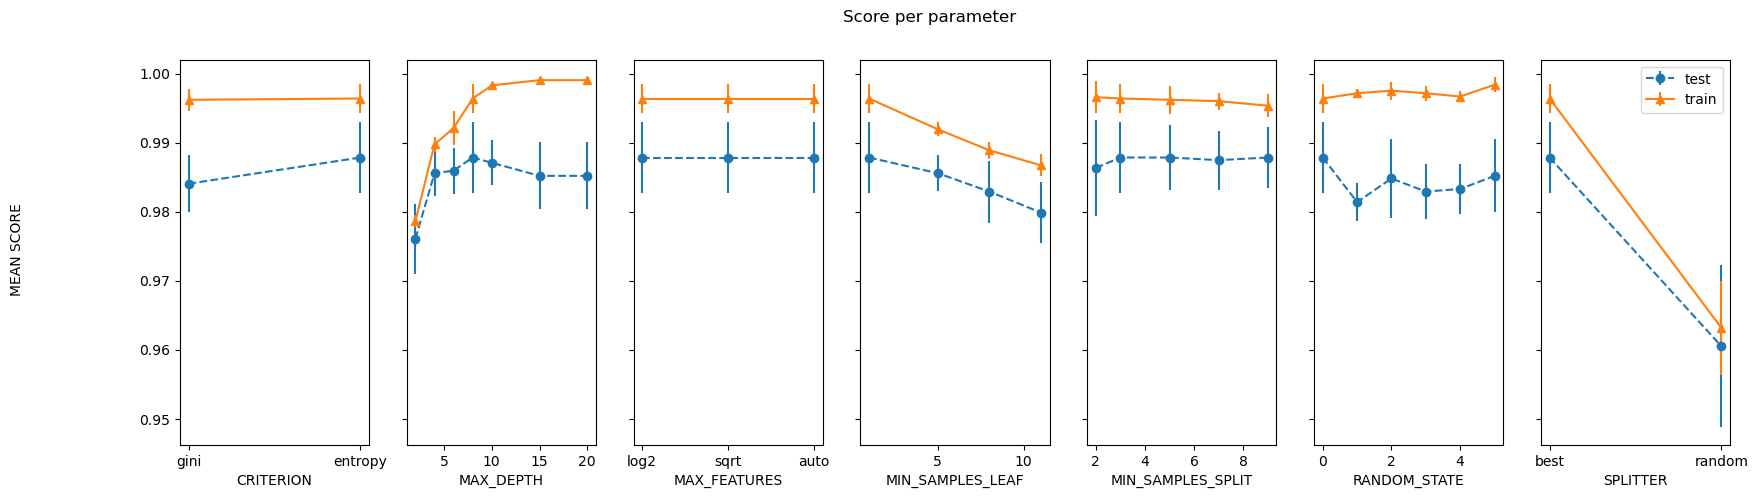

In [23]:
import matplotlib.pyplot as plt

def plot_search_results(grid):
    """
    Params: 
        grid: A trained GridSearchCV object.
    """
    ## Results from grid search
    results = grid.cv_results_
    means_test = results['mean_test_score']
    stds_test = results['std_test_score']
    means_train = results['mean_train_score']
    stds_train = results['std_train_score']

    ## Getting indexes of values per hyper-parameter
    masks=[]
    masks_names= list(grid.best_params_.keys())
    for p_k, p_v in grid.best_params_.items():
        masks.append(list(results['param_'+p_k].data==p_v))

    params=grid.param_grid

    ## Ploting results
    fig, ax = plt.subplots(1,len(params),sharex='none', sharey='all',figsize=(20,5))
    fig.suptitle('Score per parameter')
    fig.text(0.04, 0.5, 'MEAN SCORE', va='center', rotation='vertical')
    pram_preformace_in_best = {}
    for i, p in enumerate(masks_names):
        m = np.stack(masks[:i] + masks[i+1:])
        pram_preformace_in_best
        best_parms_mask = m.all(axis=0)
        best_index = np.where(best_parms_mask)[0]
        x = np.array(params[p])
        y_1 = np.array(means_test[best_index])
        e_1 = np.array(stds_test[best_index])
        y_2 = np.array(means_train[best_index])
        e_2 = np.array(stds_train[best_index])
        ax[i].errorbar(x, y_1, e_1, linestyle='--', marker='o', label='test')
        ax[i].errorbar(x, y_2, e_2, linestyle='-', marker='^',label='train' )
        ax[i].set_xlabel(p.upper())

    plt.legend()
    plt.show()

plot_search_results(grid_search_dt)